In [1]:
from tensorflow.keras import datasets
import tensorflow as tf

In [2]:
mnist = datasets.mnist
(X_train, t_train), (X_test, t_test) = mnist.load_data()

X_train.shape, t_train.shape

image = X_train[0]
image.shape

11490434/11490434 [==============================] - 0s 0us/step


(28, 28)

5


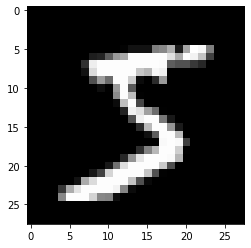

In [3]:
import matplotlib.pyplot as plt
print(t_train[0])
plt.imshow(image, cmap='gray')
plt.show()

7


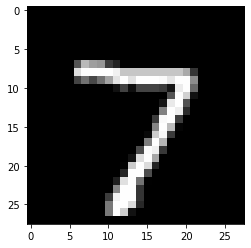

In [4]:
print(t_test[0])
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [5]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

import numpy as np
np.min(X_train), np.max(X_train)

(0.0, 1.0)

Sequential model 구조 만들기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Flatten, Dense

model = Sequential([
    # 입력층에는 배치를 제외한 나머지 이미지의 형상을 받아야 한다.
    # Feature Extraction
    Conv2D(filters=64, kernel_size=3, padding='SAME', input_shape=(28, 28, 1)),
    ReLU(),
    Conv2D(filters=64, kernel_size=3, padding='SAME'),
    ReLU(),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    MaxPooling2D(pool_size=2),
    # Fully Connected
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 re_lu (ReLU)                (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                        

In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['acc']
)

In [17]:
model.fit(
    X_train, t_train,
    validation_split =  0.2,
    epochs=10,
    batch_size=64
    )

Epoch 1/10
750/750 [==============================] - 333s 444ms/step - loss: 0.0851 - acc: 0.9753 - val_loss: 0.1000 - val_acc: 0.9709
Epoch 2/10
750/750 [==============================] - 328s 438ms/step - loss: 0.0827 - acc: 0.9773 - val_loss: 0.0660 - val_acc: 0.9800
Epoch 3/10
750/750 [==============================] - 330s 440ms/step - loss: 0.0778 - acc: 0.9785 - val_loss: 0.0781 - val_acc: 0.9781
Epoch 4/10
750/750 [==============================] - 327s 436ms/step - loss: 0.0763 - acc: 0.9790 - val_loss: 0.0669 - val_acc: 0.9805
Epoch 5/10
750/750 [==============================] - 330s 440ms/step - loss: 0.0604 - acc: 0.9837 - val_loss: 0.0678 - val_acc: 0.9859
Epoch 6/10
750/750 [==============================] - 334s 445ms/step - loss: 0.0659 - acc: 0.9820 - val_loss: 0.0783 - val_acc: 0.9817
Epoch 7/10
750/750 [==============================] - 328s 437ms/step - loss: 0.0754 - acc: 0.9821 - val_loss: 0.0657 - val_acc: 0.9830
Epoch 8/10
750/750 [============================

In [18]:
image = X_test[0]
image.shape

image = image[tf.newaxis, ...]
image.shape

model.predict(image)

1/1 [==============================] - 0s 78ms/step


array([[4.9027245e-21, 3.2331817e-13, 6.2031306e-15, 5.3327182e-14,
        1.2476906e-15, 5.9107283e-20, 2.2254479e-28, 1.0000000e+00,
        1.5146456e-20, 1.8271668e-14]], dtype=float32)